In [1]:
import scipy as sp
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np


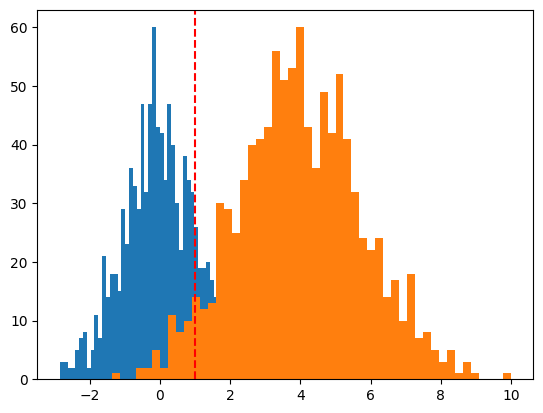

In [2]:
mu = 0
sigma = 1
x1 = norm.rvs(loc=mu, scale=sigma, size=1000)

mu2 = 4
sigma2 = 1.8
x2 = norm.rvs(loc=mu2, scale=sigma2, size=1000)

# Definamos la frontera x = 2
frontera = 1

plt.hist(x1, bins=50)
plt.hist(x2, bins=50)
plt.axvline(x = frontera, color='red', linestyle='--')
plt.show()

In [3]:
TP = (x2>frontera).sum() # Modelo predice 1 y es 1.
TN = (x1<frontera).sum() # Modelo predice 0 y es 0.
FP = (x1>frontera).sum() # Modelo predice 1 y es 0.
FN = (x2<frontera).sum() # Modelo predice 0 y es 1

print(f"Verdaderos positivos {TP}")
print(f"Verdaderos negativos {TN}")
print(f"Falsos positivos {FP}")
print(f"Falsos negativos {FN}")

Verdaderos positivos 955
Verdaderos negativos 845
Falsos positivos 155
Falsos negativos 45


In [4]:
E = TN/(TN + FP)
S = TP/(TP + FN)
Exa = (TP + TN)/(TP + TN + FP + FN)
P = TP/(TP+FP)


print(f"La especificidad es: {E}")
print(f"La sensibilidad es: {S}")
print(f"La exactitud es: {Exa}")
print(f"La precision es: {P}")



La especificidad es: 0.845
La sensibilidad es: 0.955
La exactitud es: 0.9
La precision es: 0.8603603603603603


In [5]:
frontera = np.linspace(-5,15,200)
E = np.zeros(len(frontera))
S = np.zeros(len(frontera))
Exa = np.zeros(len(frontera))
P = np.zeros(len(frontera))

k = 0
for i in frontera:
  TP = (x2>i).sum() # Modelo predice 1 y es 1.
  TN = (x1<i).sum() # Modelo predice 0 y es 0.
  FP = (x1>i).sum() # Modelo predice 1 y es 0.
  FN = (x2<i).sum() # Modelo predice 0 y es 1
  E[k] = TN/(TN + FP)
  S[k] = TP/(TP + FN)
  Exa[k] = (TP + TN)/(TP + TN + FP + FN)
  P[k] = TP/(TP+FP)
  k += 1



<ipython-input-5-ba2f1fc010db>:16: RuntimeWarning: invalid value encountered in long_scalars
  P[k] = TP/(TP+FP)


In [6]:
from scipy.interpolate import CubicSpline
Enew = 1 - E
q = np.argsort(Enew)
Enew_or = Enew[q]
S_or = S[q]

In [7]:
#X=np.array([34, 1, 3, 60, 1])


In [8]:
#q=np.argsort(X)

In [9]:
#X[q]

In [10]:
#[q]

In [11]:
Enew_or

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.003, 0.003,
       0.004, 0.007,

Text(0.5, 1.0, 'S vs 1-E')

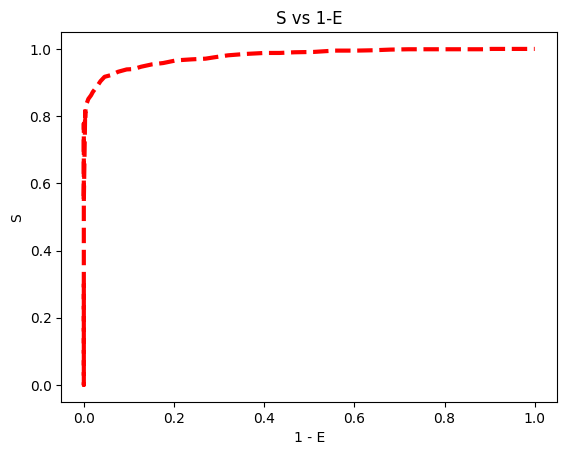

In [12]:
plt.plot(Enew_or, S_or, color = 'red', linestyle='--', linewidth= 3)
plt.xlabel("1 - E")
plt.ylabel("S")
plt.title("S vs 1-E")

In [13]:
print(Enew[0])
print(Enew[-1])
print(S[0])
print(S[-1])

1.0
0.0
1.0
0.0


Text(0, 0.5, 'Sensibilidad')

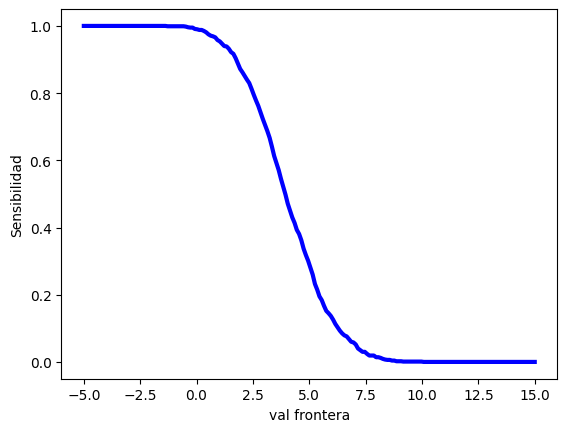

In [14]:
plt.plot(frontera, S, color = 'blue', linewidth = 3)
plt.xlabel("val frontera")
plt.ylabel("Sensibilidad")

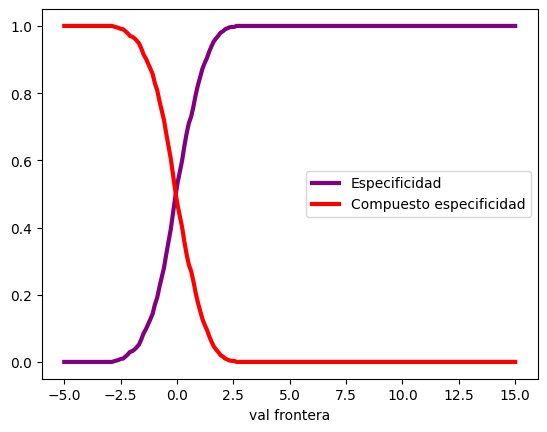

In [15]:
plt.plot(frontera, E, color = 'purple', linewidth = 3, label = "Especificidad")
plt.plot(frontera, 1-E, color = 'red', linewidth = 3, label = "Compuesto especificidad")
plt.xlabel("val frontera")
plt.ylabel("")
plt.legend()

Text(0, 0.5, '1 - E')

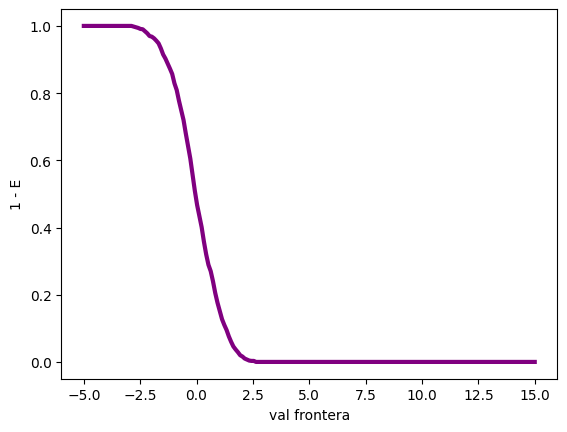

In [16]:
plt.plot(frontera, 1 - E, color = 'purple', linewidth = 3)
plt.xlabel("val frontera")
plt.ylabel("1 - E")

Ahora vamos a usar el modelo de **Random Forest** para optimizar está frontera.

In [17]:
from scipy.stats import norm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


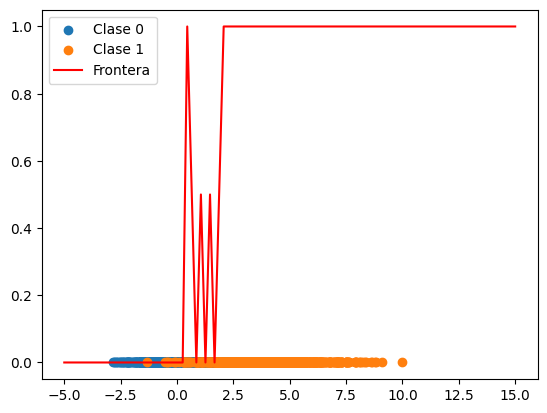

In [19]:
np.random.seed(0)
X = np.concatenate([x1, x2])
y = np.concatenate([np.zeros(1000), np.ones(1000)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear modelo de Random Forest
rfc = RandomForestClassifier(n_estimators=2)
rfc.fit(X_train.reshape(-1, 1), y_train)

# Visualizar resultados
plt.scatter(X_train[y_train == 0], np.zeros_like(X_train[y_train == 0]), label='Clase 0')
plt.scatter(X_train[y_train == 1], np.zeros_like(X_train[y_train == 1]), label='Clase 1')
plt.plot(np.linspace(-5, 15, 100), rfc.predict_proba(np.linspace(-5, 15, 100).reshape(-1, 1))[:, 1], label='Frontera', color = 'red')
plt.legend()
plt.show()


In [27]:
np.random.seed(0)
X = np.concatenate([x1, x2])
y = np.concatenate([np.zeros(1000), np.ones(1000)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
np.shape(X_train.reshape(-1, 1))

(1600, 1)

In [45]:
np.random.seed(0)
X = np.concatenate([x1, x2]).reshape(2000,1)
y = np.concatenate([np.zeros(1000), np.ones(1000)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear modelo de Random Forest
rfc = RandomForestClassifier(n_estimators=3)
rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=3)

In [46]:
rfc.score(X_test,y_test)

0.895

In [47]:
rfc.score(X_train,y_train)

0.97125

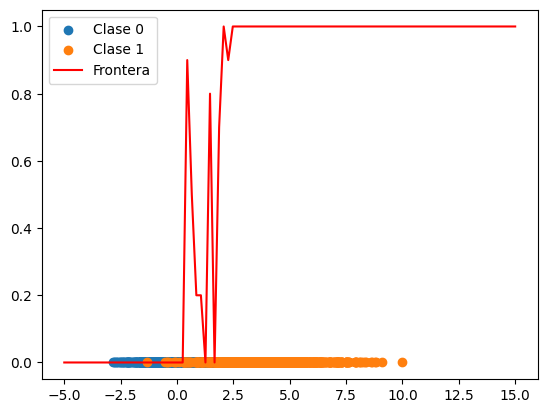

In [38]:

# Visualizar resultados
plt.scatter(X_train[y_train == 0], np.zeros_like(X_train[y_train == 0]), label='Clase 0')
plt.scatter(X_train[y_train == 1], np.zeros_like(X_train[y_train == 1]), label='Clase 1')
plt.plot(np.linspace(-5, 15, 100), rfc.predict_proba(np.linspace(-5, 15, 100).reshape(-1, 1))[:, 1], label='Frontera', color = 'red')
plt.legend()
plt.show()


Cuando rfc.score(X_test, y_test) se aleja mucho de rfc.score(X_train, y_train) se dice que hay mayor overfitting.

**Tarea:**

1. Implementar un grid.search.

2. dibujar la clase 1 arriba y la case 0 abajo, para que se vea con mayor claridad la frontera.